# Phase 1 - Week 2 - Day 2AM - Support Vector Machine (SVM)

Support Vector Machine (SVM) is a type of Supervised Learning algorithm used to solve Classification and Regression problems.

SVM works by finding the decision boundary that maximizes the distance from the nearest data points of all the classes. This boundary is also called a hyperplane.

Terminology :
* Support Vector : the outermost data object closest to the hyperplane.

* Margin : distance between support vector and hyperplane.

* Hyperplane : a function that can be used as a separator between classes. Hyperplane also known as the decision boundary.

<img src='https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm5.png'>

For this tutorial, we will use dataset that contains demographics about customer and whether that customer buy a product from ads or not.

# A. Data Loading

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, f1_score

In [2]:
# Data Loading

ads_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D4PM%20-%20Social%20Network%20Ads.csv')
ads_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
# Splitting between `X` and `y`

X = ads_df.drop(['Purchased'], axis=1)
y = ads_df['Purchased']
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [4]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (300, 2)
Test size  :  (100, 2)


# B. SVM Performance

## B.1 -  With or without Feature Scales

Feature scaling plays a significant role in the performance of Support Vector Machines (SVMs) and other machine learning algorithms. SVMs are particularly sensitive to the scale of features due to their reliance on calculating distances between data points.

The effect of feature scaling in SVM are :
1. Converge faster.
2. Balanced influence of features.
3. Better decision boundaries.
4. More robust to outliers.

*Let's check the effect of with and without feature scaling in out case.*

In [5]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Training using Linear SVM
%%time
from sklearn.svm import SVC

svm_non_scaled = SVC(kernel='linear')
svm_scaled = SVC(kernel='linear')

svm_non_scaled.fit(X_train, y_train)
svm_scaled.fit(X_train_scaled, y_train)

CPU times: user 20.8 s, sys: 30.4 ms, total: 20.8 s
Wall time: 26.5 s


SVC(kernel='linear')

In [7]:
# Model Evaluation

def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  return f1_score(y, y_pred)

print('Non Scaled SVM')
print('Train : ', performance_check(svm_non_scaled, X_train, y_train))
print('Test  : ', performance_check(svm_non_scaled, X_test, y_test))
print('')

print('Scaled SVM')
print('Train : ', performance_check(svm_scaled, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_scaled, X_test_scaled, y_test))

Non Scaled SVM
Train :  0.7244897959183674
Test  :  0.7857142857142856

Scaled SVM
Train :  0.7850467289719627
Test  :  0.8387096774193549


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


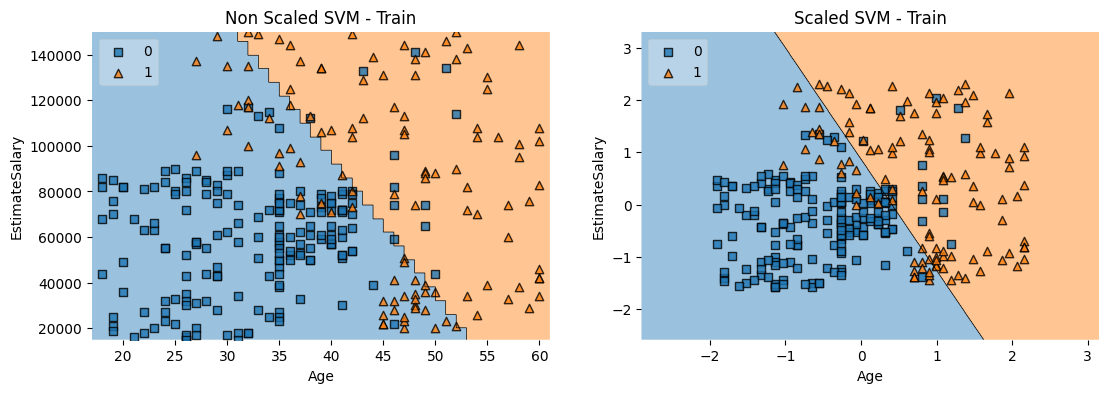

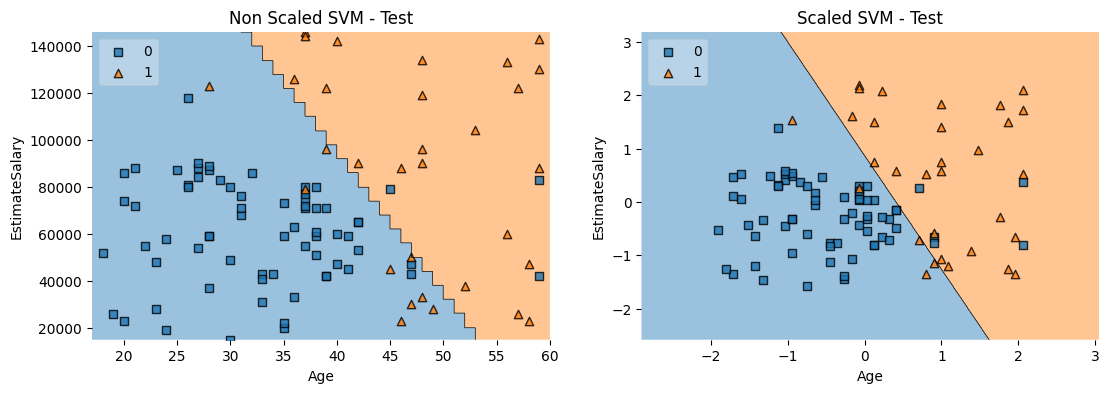

In [8]:
# Plot Decision Boundary
from mlxtend.plotting import plot_decision_regions

## Non Scaled SVM - Train
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plot_decision_regions(X_train.to_numpy(), y_train.to_numpy(), clf=svm_non_scaled, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('Non Scaled SVM - Train')

## Scaled SVM - Train
plt.subplot(1, 2, 2)
plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=svm_scaled, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('Scaled SVM - Train')

## Non Scaled SVM - Test
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plot_decision_regions(X_test.to_numpy(), y_test.to_numpy(), clf=svm_non_scaled, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('Non Scaled SVM - Test')

## Scaled SVM - Test
plt.subplot(1, 2, 2)
plot_decision_regions(X_test_scaled, y_test.to_numpy(), clf=svm_scaled, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('Scaled SVM - Test')

plt.show()

**CONCLUSION**

From F1 Score and plot of decision boundaries, it can be seen that SVM works better if we use feature scaling.

## B.2 - Different Kernels

In [9]:
# Model Training using different kernels
%%time

svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train_scaled, y_train)
svm_poly.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

CPU times: user 8.09 ms, sys: 0 ns, total: 8.09 ms
Wall time: 8.53 ms


SVC()

In [10]:
# Model Evaluation

print('SVM - Linear')
print('Train : ', performance_check(svm_linear, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_linear, X_test_scaled, y_test))
print('')

print('SVM - Polynomial')
print('Train : ', performance_check(svm_poly, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_poly, X_test_scaled, y_test))
print('')

print('SVM - RBF')
print('Train : ', performance_check(svm_rbf, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_rbf, X_test_scaled, y_test))
print('')

SVM - Linear
Train :  0.7850467289719627
Test  :  0.8387096774193549

SVM - Polynomial
Train :  0.7539267015706808
Test  :  0.7719298245614036

SVM - RBF
Train :  0.8831168831168831
Test  :  0.909090909090909



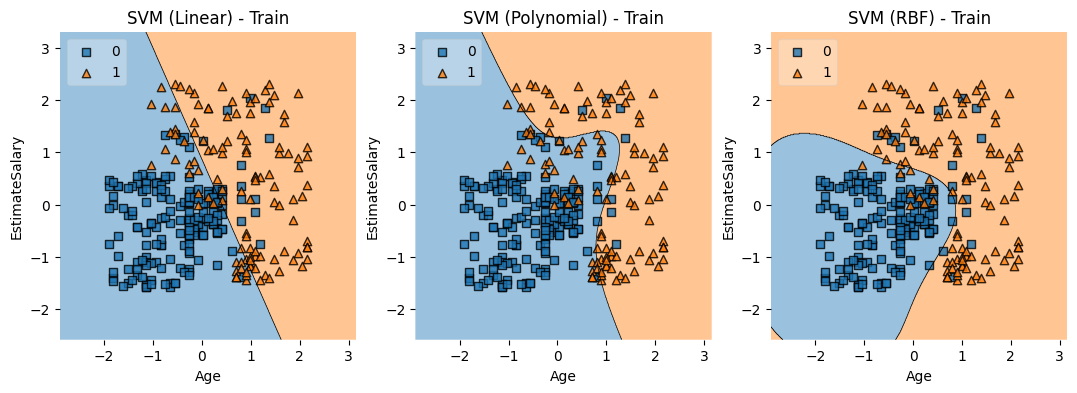

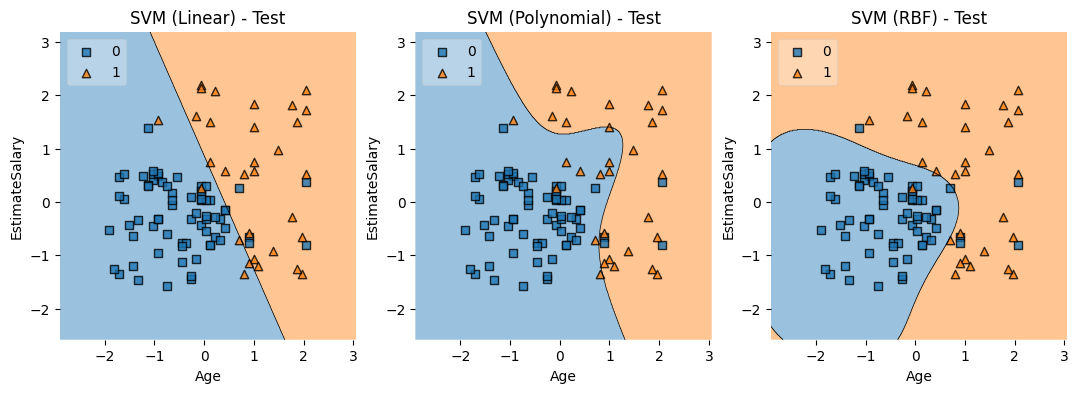

In [11]:
# Plot Decision Boundary
## SVM (Linear) - Train
plt.figure(figsize=(13, 4))
plt.subplot(1, 3, 1)
plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=svm_linear, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM (Linear) - Train')

## SVM (Polynomial) - Train
plt.subplot(1, 3, 2)
plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=svm_poly, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM (Polynomial) - Train')

## SVM (RBF) - Train
plt.subplot(1, 3, 3)
plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=svm_rbf, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM (RBF) - Train')

## SVM (Linear) - Test
plt.figure(figsize=(13, 4))
plt.subplot(1, 3, 1)
plot_decision_regions(X_test_scaled, y_test.to_numpy(), clf=svm_linear, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM (Linear) - Test')

## SVM (Polynomial) - Test
plt.subplot(1, 3, 2)
plot_decision_regions(X_test_scaled, y_test.to_numpy(), clf=svm_poly, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM (Polynomial) - Test')

## SVM (RBF) - Test
plt.subplot(1, 3, 3)
plot_decision_regions(X_test_scaled, y_test.to_numpy(), clf=svm_rbf, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM (RBF) - Test')

plt.show()

**CONCLUSION**

From F1 Score and decision boundaries plot, SVM with kernel `RBF` has the highest performance compare to other kernel.

## B.3 - Different Hyperparameter `C`

The hyperparameter `C`, referred as the penalty parameter or regularization. It controls the trade-off between achieving error both in training phase and testing phase. This hyperparameter indicates how many misclassification/errors in the training data are allowed within the model. It’s also useful when the data is imbalanced.

Effect of `C` :
1. Smaller values :
   * Can result in simpler and more generalizable models
   * They might sacrifice some training accuracy.

2. Larger values :
   * Can lead to models that fit the training data closely
   * Can lead to overfitting

The image below is illustration of different `C` against decision boundary.

<img src='https://s3.stackabuse.com/media/articles/understanding-svm-hyperparameters-1.png'>

In [12]:
# Model Training using different C
%%time

svm_rbf_1 = SVC(kernel='rbf', C=0.1)
svm_rbf_500 = SVC(kernel='rbf', C=500)

svm_rbf_1.fit(X_train_scaled, y_train)
svm_rbf_500.fit(X_train_scaled, y_train)

CPU times: user 16.9 ms, sys: 0 ns, total: 16.9 ms
Wall time: 17.2 ms


SVC(C=500)

In [13]:
# Model Evaluation

print('SVM - C=0.1')
print('Train : ', performance_check(svm_rbf_1, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_rbf_1, X_test_scaled, y_test))
print('')

print('SVM - C=500')
print('Train : ', performance_check(svm_rbf_500, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_rbf_500, X_test_scaled, y_test))
print('')

SVM - C=0.1
Train :  0.8672566371681416
Test  :  0.875

SVM - C=500
Train :  0.8908296943231441
Test  :  0.8923076923076922



Text(0.5, 1.0, 'SVM - C=500')

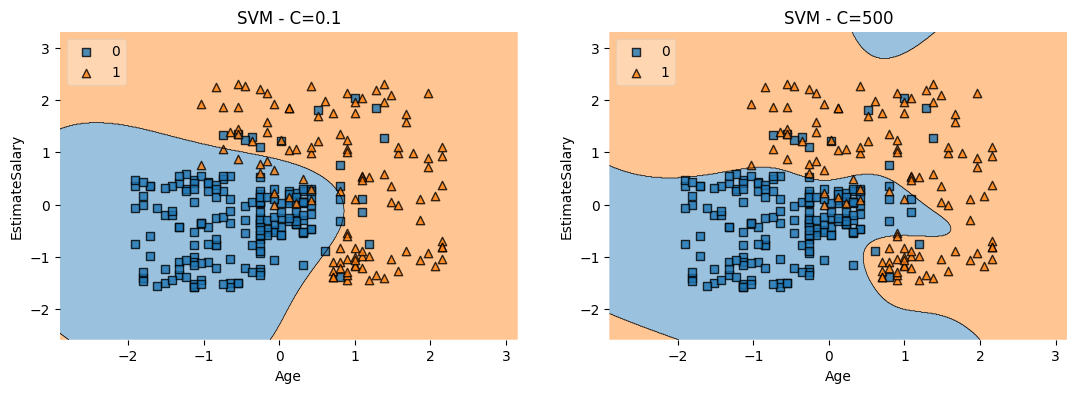

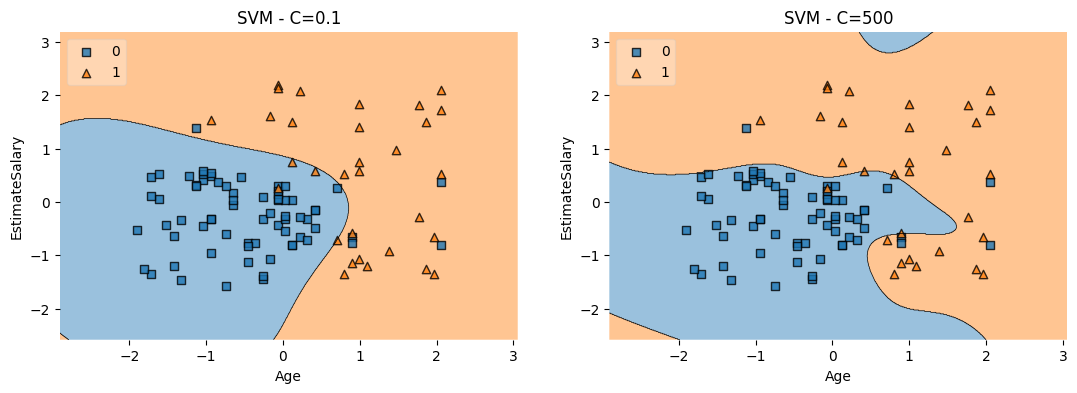

In [14]:
## SVM - C=0.1
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=svm_rbf_1, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM - C=0.1')

## SVM - C=500
plt.subplot(1, 2, 2)
plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=svm_rbf_500, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM - C=500')

## SVM - C=0.1
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plot_decision_regions(X_test_scaled, y_test.to_numpy(), clf=svm_rbf_1, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM - C=0.1')

## SVM - C=500
plt.subplot(1, 2, 2)
plot_decision_regions(X_test_scaled, y_test.to_numpy(), clf=svm_rbf_500, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM - C=500')

**CONCLUSION**

As we increase the value of `C`, the model has higher accuracy in terms of train performance. Fortunately, the test performance also higher than SVM with lower `C`.

## B.4 - Different Hyperparameter `gamma`

The hyperparameter `gamma` is used to controls the influence of individual training samples on the decision boundary. It affects the shape and flexibility of the decision boundary, especially in the case of non-linear kernels such as Radial Basis Function (RBF) kernel.

Effect of gamma :
1. Smaller values :
   * It will lead to smoother decision boundaries and more generalizable models  
   * Might sacrifice some training accuracy
    
2. Larger values :
   * It can lead to decision boundaries that fit the training data more closely
   * Potentially leading to overfitting.


In [15]:
# Model Training using different gamma
%%time

svm_rbf_500_1 = SVC(kernel='rbf', C=500, gamma=0.1)
svm_rbf_500_100 = SVC(kernel='rbf', C=500, gamma=100)

svm_rbf_500_1.fit(X_train_scaled, y_train)
svm_rbf_500_100.fit(X_train_scaled, y_train)

CPU times: user 10.3 ms, sys: 0 ns, total: 10.3 ms
Wall time: 11.4 ms


SVC(C=500, gamma=100)

In [16]:
# Model Evaluation

print('SVM - gamma=0.1')
print('Train : ', performance_check(svm_rbf_500_1, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_rbf_500_1, X_test_scaled, y_test))
print('')

print('SVM - gamma=100')
print('Train : ', performance_check(svm_rbf_500_100, X_train_scaled, y_train))
print('Test  : ', performance_check(svm_rbf_500_100, X_test_scaled, y_test))
print('')

SVM - gamma=0.1
Train :  0.8831168831168831
Test  :  0.8787878787878788

SVM - gamma=100
Train :  0.9910714285714286
Test  :  0.6181818181818182



Text(0.5, 1.0, 'SVM - gamma=100')

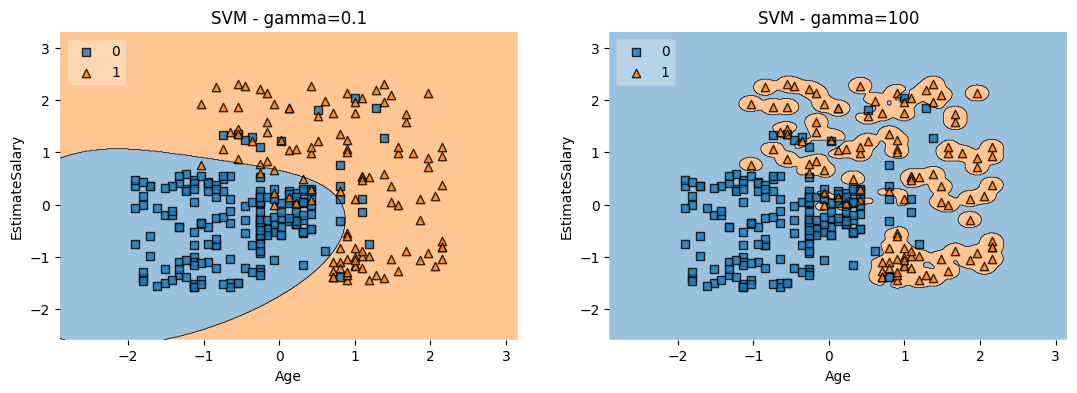

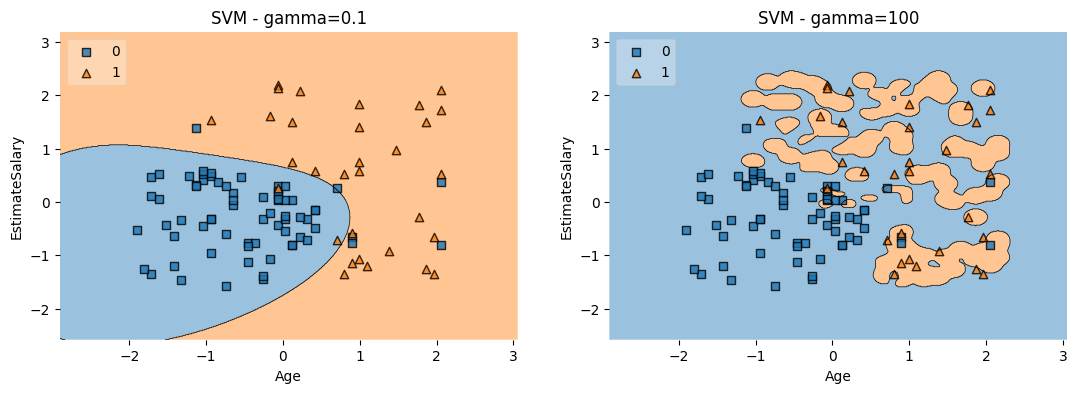

In [17]:
## SVM - gamma=0.1
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=svm_rbf_500_1, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM - gamma=0.1')

## SVM - gamma=100
plt.subplot(1, 2, 2)
plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=svm_rbf_500_100, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM - gamma=100')

## SVM - gamma=0.1
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plot_decision_regions(X_test_scaled, y_test.to_numpy(), clf=svm_rbf_500_1, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM - gamma=0.1')

## SVM - gamma=100
plt.subplot(1, 2, 2)
plot_decision_regions(X_test_scaled, y_test.to_numpy(), clf=svm_rbf_500_100, legend=2)
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.title('SVM - gamma=100')

**CONCLUSION**

Increasing the `gamma` will make the decision boundary tighter which will result in high performance model during training but low performance model during testing.

## B.5 - Summary

Below are the summary of our experiment :

1. Trying different kernels and hyperparameters will impact the decision boundary and can lead to model performance.

2. From this problem, we have the best configuration is :
   ```
   kernel = rbf
   c = 500
   gamma = 0.1
   ```

3. The steps we just did is called Hyperparameter Tuning, which is training and testing various scenarios to find the best hyperparameter.